In [1]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()
from datetime import date, timedelta
import seaborn as sns

In [2]:
import sys
sys.path.insert(1, '/project/cper_neon_aop/cper_hls_veg_models/diet_quality/')

In [3]:
from pheno_metrics import pheno_fq_metrics

In [4]:
df_ndvi = pd.read_csv('../summarize_pastures/outputs/cper_pasture_ndvi_2000_2024.csv', parse_dates=['date'])

In [5]:
outPATH = '../data/training/cper_pasture_2000_2024_fq_predictions.csv'

In [6]:
df_ndvi

date Pasture      NDVI  Year Source
0      2000-02-24     10S  0.126772  2000    LMF
1      2000-02-25     10S  0.125724  2000    LMF
2      2000-02-26     10S  0.124723  2000    LMF
3      2000-02-27     10S  0.123769  2000    LMF
4      2000-02-28     10S  0.122864  2000    LMF
...           ...     ...       ...   ...    ...
228711 2024-10-10     8SE  0.224923  2024    HLS
228712 2024-10-11     8SE  0.222330  2024    HLS
228713 2024-10-12     8SE  0.219774  2024    HLS
228714 2024-10-13     8SE  0.217257  2024    HLS
228715 2024-10-14     8SE  0.214785  2024    HLS

[228716 rows x 5 columns]

In [7]:
df_pheno = df_ndvi.groupby(['Pasture', 'Year']).progress_apply(lambda x: pheno_fq_metrics(x['NDVI'].values))

  3%|▎         | 19/636 [00:00<00:26, 23.59it/s]/project/cper_neon_aop/cper_hls_veg_models/diet_quality/pheno_metrics.py:25: RuntimeWarning: overflow encountered in exp
  y = vmin + vmax * ( (1 / (1 + np.exp(-scaleS * (x - sos)))) + (1 / (1 + np.exp(scaleA * (x - eos)))) - 1 )
100%|██████████| 636/636 [00:18<00:00, 34.94it/s]


In [8]:
df_pheno = df_pheno.reset_index()

In [9]:
df_pheno = df_pheno.drop(columns='level_2')

In [10]:
df_pheno['date'] = df_ndvi['date']

In [11]:
df_pheno.head(20)

Pasture  Year      NDVI  NDVI_d30  t_peak_IRG  iNDVI  iNDVI_dry  NDVI_rate  \
0      10S  2000  0.126772       0.0        -113    0.0        0.0        0.0   
1      10S  2000  0.125724       0.0        -112    0.0        0.0        0.0   
2      10S  2000  0.124723       0.0        -111    0.0        0.0        0.0   
3      10S  2000  0.123769       0.0        -110    0.0        0.0        0.0   
4      10S  2000  0.122864       0.0        -109    0.0        0.0        0.0   
5      10S  2000  0.122008       0.0        -108    0.0        0.0        0.0   
6      10S  2000  0.121201       0.0        -107    0.0        0.0        0.0   
7      10S  2000  0.120443       0.0        -106    0.0        0.0        0.0   
8      10S  2000  0.119735       0.0        -105    0.0        0.0        0.0   
9      10S  2000  0.119077       0.0        -104    0.0        0.0        0.0   
10     10S  2000  0.118470       0.0        -103    0.0        0.0        0.0   
11     10S  2000  0.117914       0.0        -102    0.0        0.0        0.0   
12     10S  2000  0.117409       0.0        -101    0.0        0.0        0.0   
13     10S  2000  0.116957       0.0        -100    0.0        0.0        0.0   
14     10S  2000  0.116556       0.0         -99    0.0        0.0        0.0   
15     10S  2000  0.116208       0.0         -98    0.0        0.0        0.0   
16     10S  2000  0.115913       0.0         -97    0.0        0.0        0.0   
17     10S  2000  0.115672       0.0         -96    0.0        0.0        0.0   
18     10S  2000  0.115484       0.0         -95    0.0        0.0        0.0   
19     10S  2000  0.115351       0.0         -94    0.0        0.0        0.0   

    iNDVI_dry_pct  SOS_doy  t_SOS       date  
0             0.0       47    -47 2000-02-24  
1             0.0       47    -46 2000-02-25  
2             0.0       47    -45 2000-02-26  
3             0.0       47    -44 2000-02-27  
4             0.0       47    -43 2000-02-28  
5             0.0       47    -42 2000-02-29  
6             0.0       47    -41 2000-03-01  
7             0.0       47    -40 2000-03-02  
8             0.0       47    -39 2000-03-03  
9             0.0       47    -38 2000-03-04  
10            0.0       47    -37 2000-03-05  
11            0.0       47    -36 2000-03-06  
12            0.0       47    -35 2000-03-07  
13            0.0       47    -34 2000-03-08  
14            0.0       47    -33 2000-03-09  
15            0.0       47    -32 2000-03-10  
16            0.0       47    -31 2000-03-11  
17            0.0       47    -30 2000-03-12  
18            0.0       47    -29 2000-03-13  
19            0.0       47    -28 2000-03-14

In [12]:
with open('../models/diet_quality/rf_cp_ndvi_2014_2023.pkl', 'rb') as f:
    mod_cp = pd.compat.pickle_compat.load(f)
with open('../models/diet_quality/rf_dom_ndvi_2014_2023.pkl', 'rb') as f:
    mod_dom = pd.compat.pickle_compat.load(f)

In [13]:
df_pheno['CP_pred'] = mod_cp.predict(
    df_pheno.drop(columns='date').groupby(
        ['Pasture', 'Year']).rolling(7,
                                     center=False,
                                     min_periods=1).mean()[mod_cp.feature_names_in_])
df_pheno['DOM_pred'] = mod_dom.predict(
    df_pheno.drop(columns='date').groupby(
        ['Pasture', 'Year']).rolling(7, 
                                     center=False, 
                                     min_periods=1).mean()[mod_dom.feature_names_in_])

In [14]:
df_pheno

Pasture  Year      NDVI  NDVI_d30  t_peak_IRG      iNDVI  iNDVI_dry  \
0          10S  2000  0.126772  0.000000        -113   0.000000   0.000000   
1          10S  2000  0.125724  0.000000        -112   0.000000   0.000000   
2          10S  2000  0.124723  0.000000        -111   0.000000   0.000000   
3          10S  2000  0.123769  0.000000        -110   0.000000   0.000000   
4          10S  2000  0.122864  0.000000        -109   0.000000   0.000000   
...        ...   ...       ...       ...         ...        ...        ...   
228711     8SE  2024  0.224923 -0.069303         160  13.284292   3.322843   
228712     8SE  2024  0.222330 -0.070633         161  13.326518   3.438074   
228713     8SE  2024  0.219774 -0.071822         162  13.366187   3.552322   
228714     8SE  2024  0.217257 -0.072875         163  13.403340   3.665347   
228715     8SE  2024  0.214785 -0.073792         164  13.438021   3.776913   

        NDVI_rate  iNDVI_dry_pct  SOS_doy  t_SOS       date  CP_pred  \
0        0.000000       0.000000       47    -47 2000-02-24   9.4100   
1        0.000000       0.000000       47    -46 2000-02-25   9.4100   
2        0.000000       0.000000       47    -45 2000-02-26   9.4100   
3        0.000000       0.000000       47    -44 2000-02-27   9.4100   
4        0.000000       0.000000       47    -43 2000-02-28   9.4100   
...           ...            ...      ...    ...        ...      ...   
228711   0.062368       0.250133       71    212 2024-10-10   6.7624   
228712   0.062273       0.257987       71    213 2024-10-11   6.8632   
228713   0.062168       0.265769       71    214 2024-10-12   6.7436   
228714   0.062053       0.273465       71    215 2024-10-13   6.9196   
228715   0.061926       0.281062       71    216 2024-10-14   6.9696   

         DOM_pred  
0       62.683200  
1       62.683200  
2       62.683200  
3       62.683200  
4       62.683200  
...           ...  
228711  61.164533  
228712  60.694633  
228713  60.665933  
228714  60.510933  
228715  60.764433  

[228716 rows x 14 columns]

In [15]:
pasts_plot = ['19N', '15E', '5E', '10S']
months_plot = np.arange(5, 11)

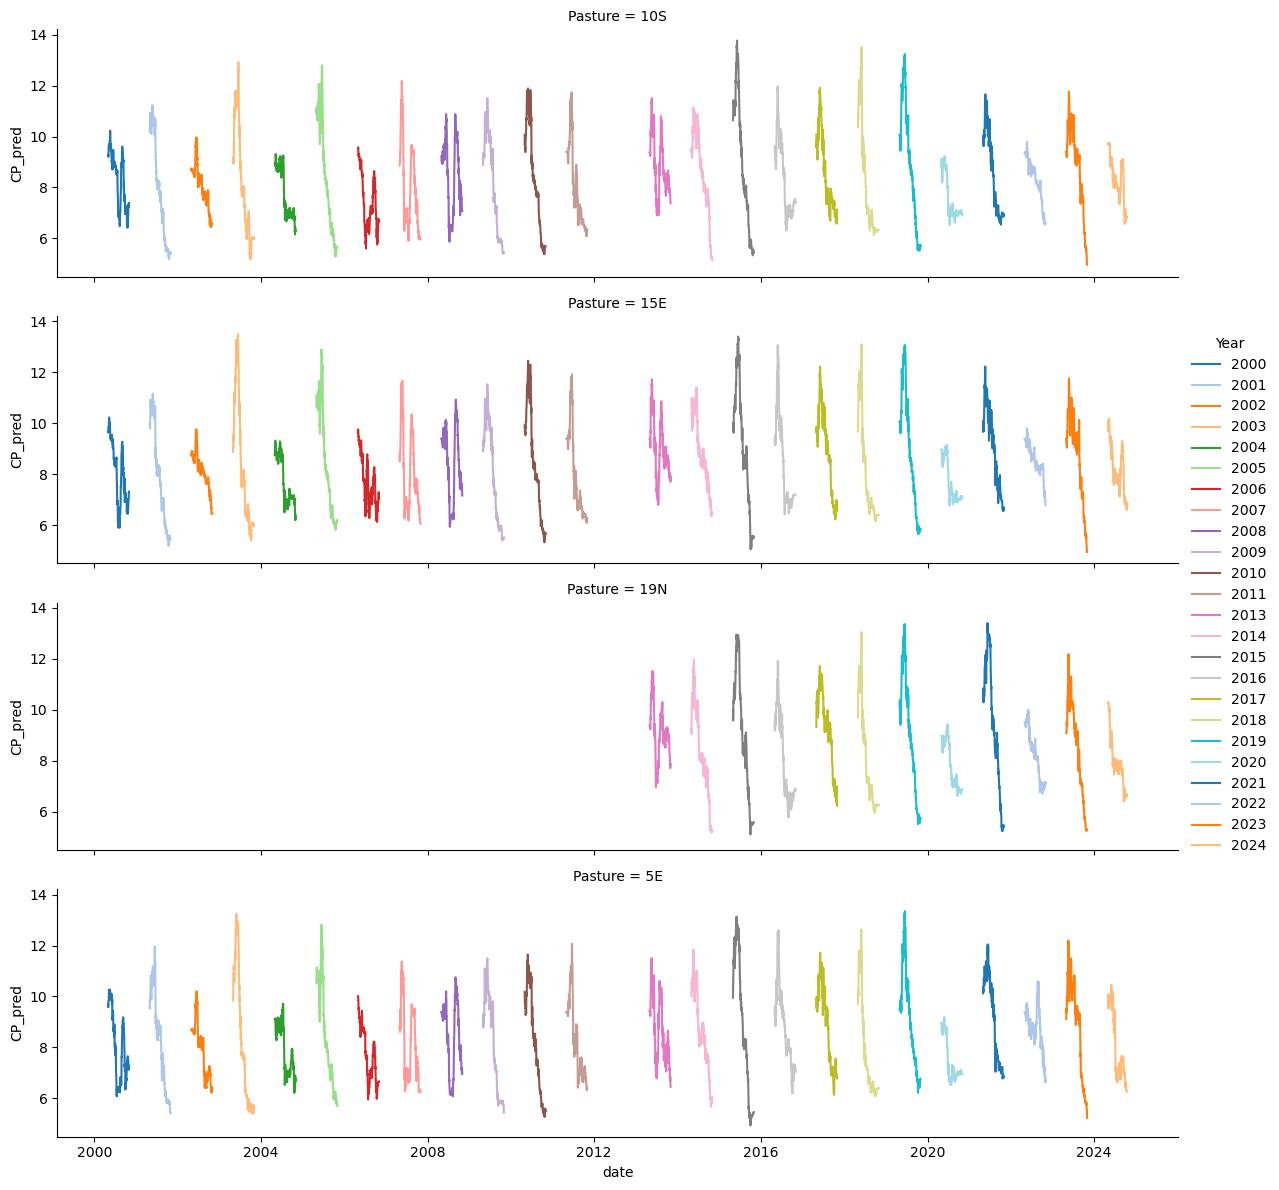

In [16]:
# plot all pastures and all dates on a single figure
sns.relplot(data=df_pheno[df_pheno['Pasture'].isin(pasts_plot) & 
            df_pheno['date'].dt.month.isin(months_plot)],
            x='date', y='CP_pred', 
            row='Pasture',
            hue='Year', palette='tab20',
            kind="line", errorbar=None,
            height=3, aspect=4)

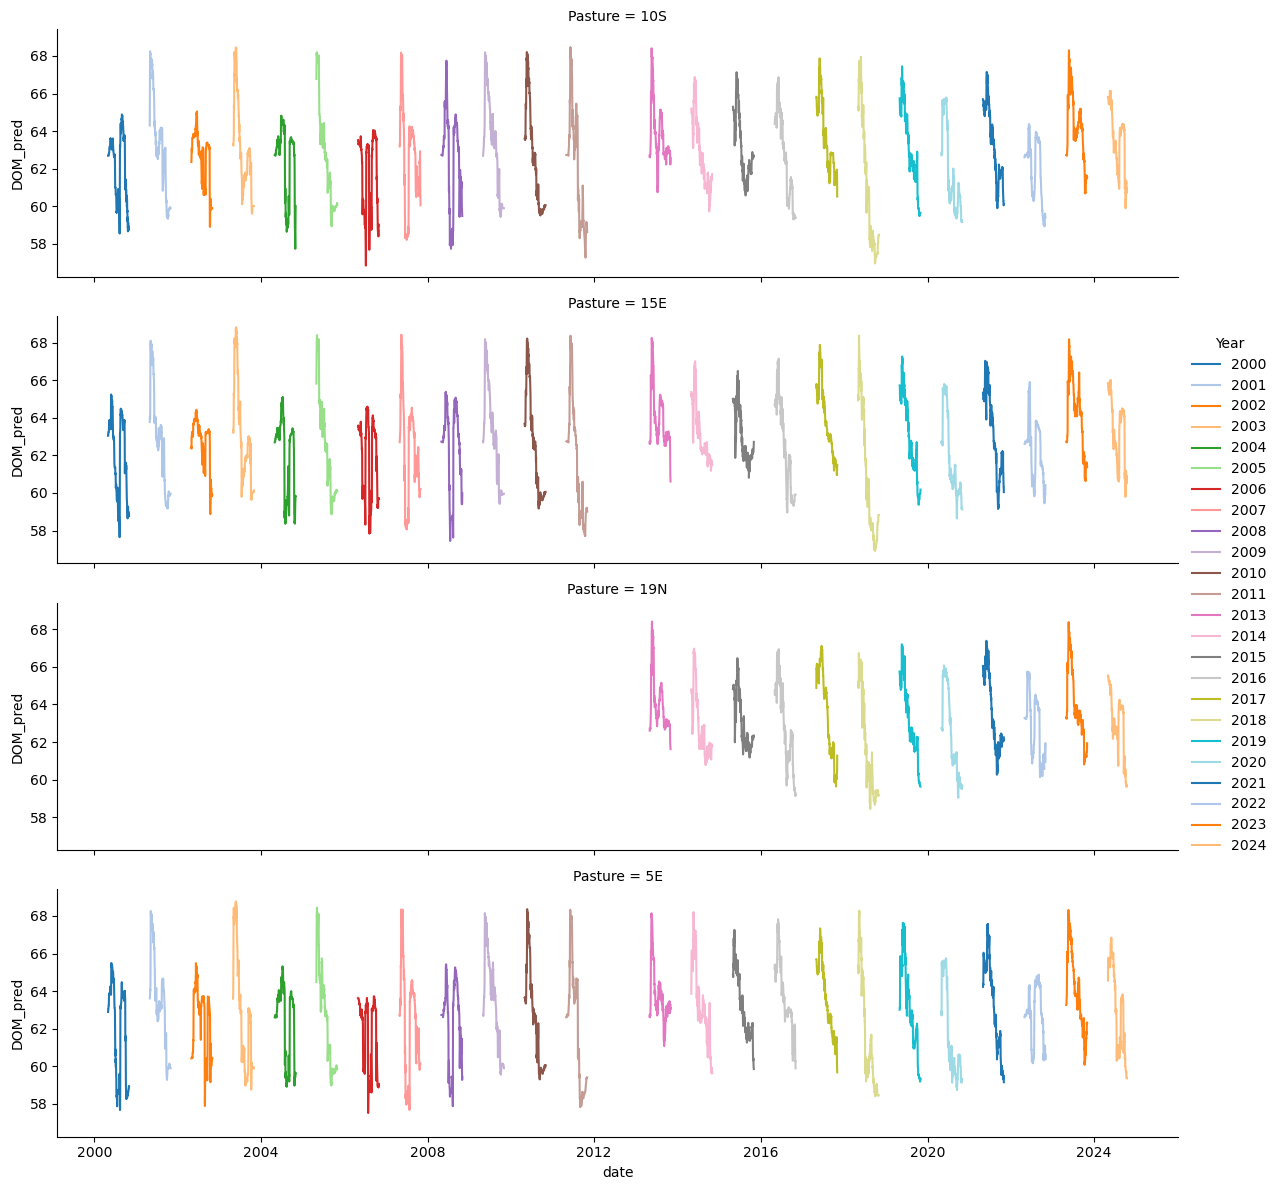

In [17]:
# plot all pastures and all dates on a single figure
sns.relplot(data=df_pheno[df_pheno['Pasture'].isin(pasts_plot) & 
            df_pheno['date'].dt.month.isin(months_plot)],
            x='date', y='DOM_pred', 
            row='Pasture',
            hue='Year', palette='tab20',
            kind="line", errorbar=None,
            height=3, aspect=4)

In [18]:
df_fq = pd.read_csv('../data/training/fecal_quality_2014_2023_pheno_metrics.csv', parse_dates=['Date'])

In [19]:
df_fq['Date'] = pd.to_datetime(df_fq['Date'].dt.date)

In [20]:
df_pheno2 = pd.merge(df_pheno, df_fq[['Date', 'PastureID', 'Crude Protein (%)', 'DOM(%)']],
                     left_on=['Pasture', 'date'], right_on=['PastureID', 'Date'], how='left')

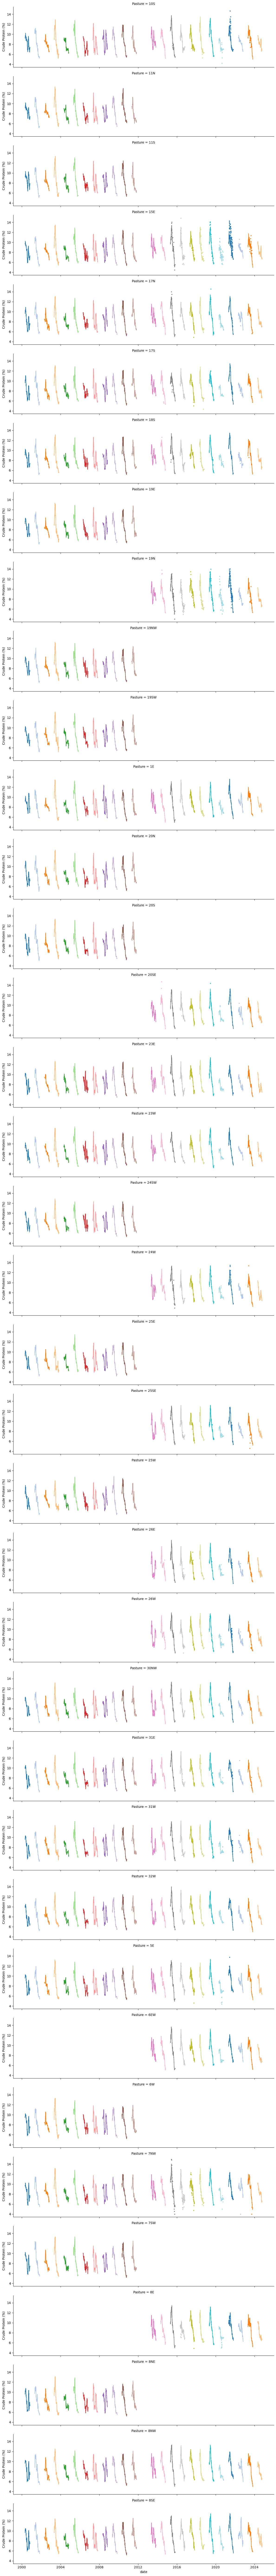

In [21]:
p = sns.FacetGrid(data=df_pheno2[df_pheno2['date'].dt.month.isin(months_plot)],
                  row='Pasture',
                  hue='Year', palette='tab20',
                  height=3, aspect=4)
p.map_dataframe(sns.lineplot,
                x='date', y='CP_pred', 
                errorbar=None)
p.map_dataframe(sns.scatterplot,
                x='date', y='Crude Protein (%)', s=8, edgecolor=None)

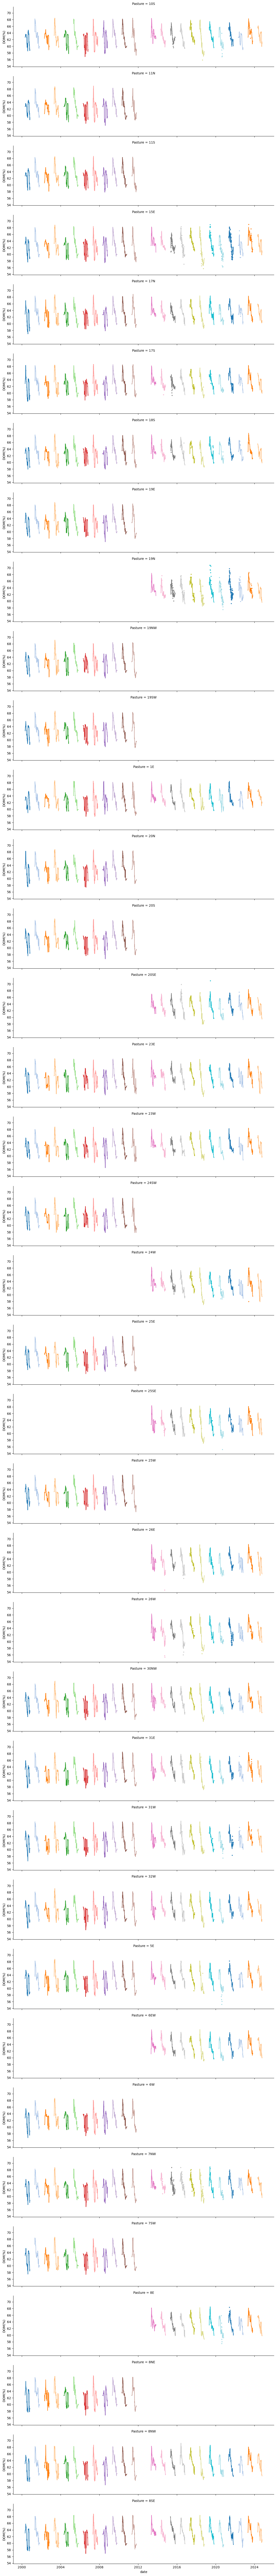

In [22]:
p = sns.FacetGrid(data=df_pheno2[df_pheno2['date'].dt.month.isin(months_plot)],
                  row='Pasture',
                  hue='Year', palette='tab20',
                  height=3, aspect=4)
p.map_dataframe(sns.lineplot,
                x='date', y='DOM_pred', 
                errorbar=None)
p.map_dataframe(sns.scatterplot,
                x='date', y='DOM(%)', s=8, edgecolor=None)

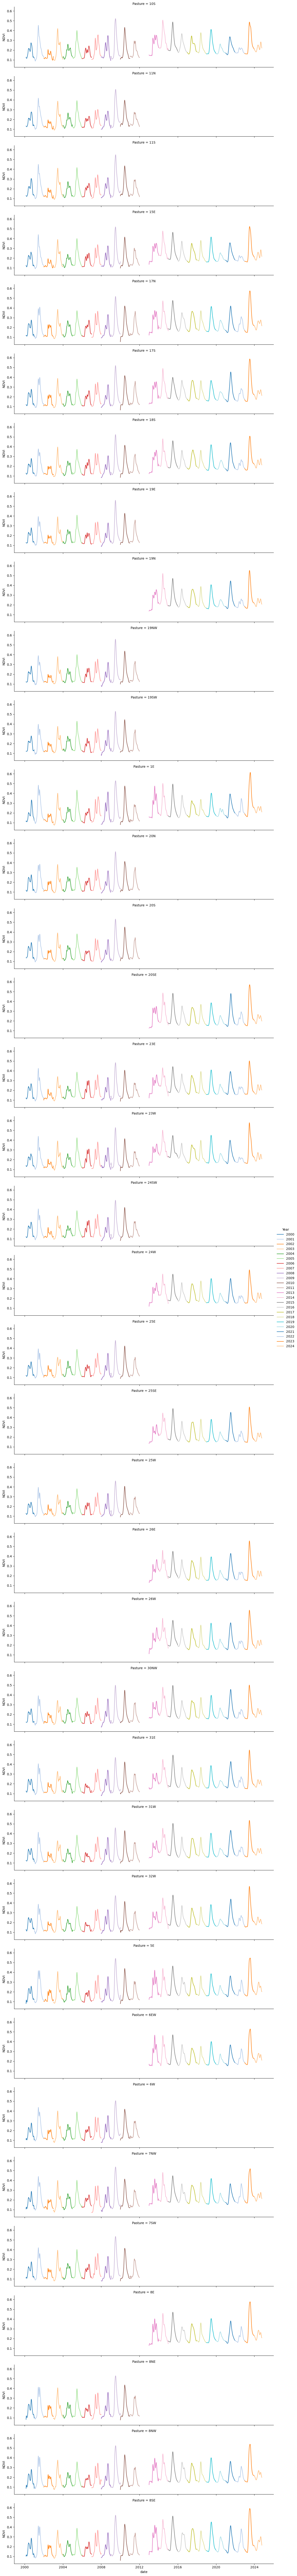

In [23]:
# plot all pastures and all dates on a single figure
sns.relplot(data=df_pheno,
            x='date', y='NDVI', 
            row='Pasture',
            hue='Year', palette='tab20',
            kind="line", errorbar=None,
            height=3, aspect=4)

In [24]:
df_pheno['DOY'] = df_pheno['date'].dt.dayofyear

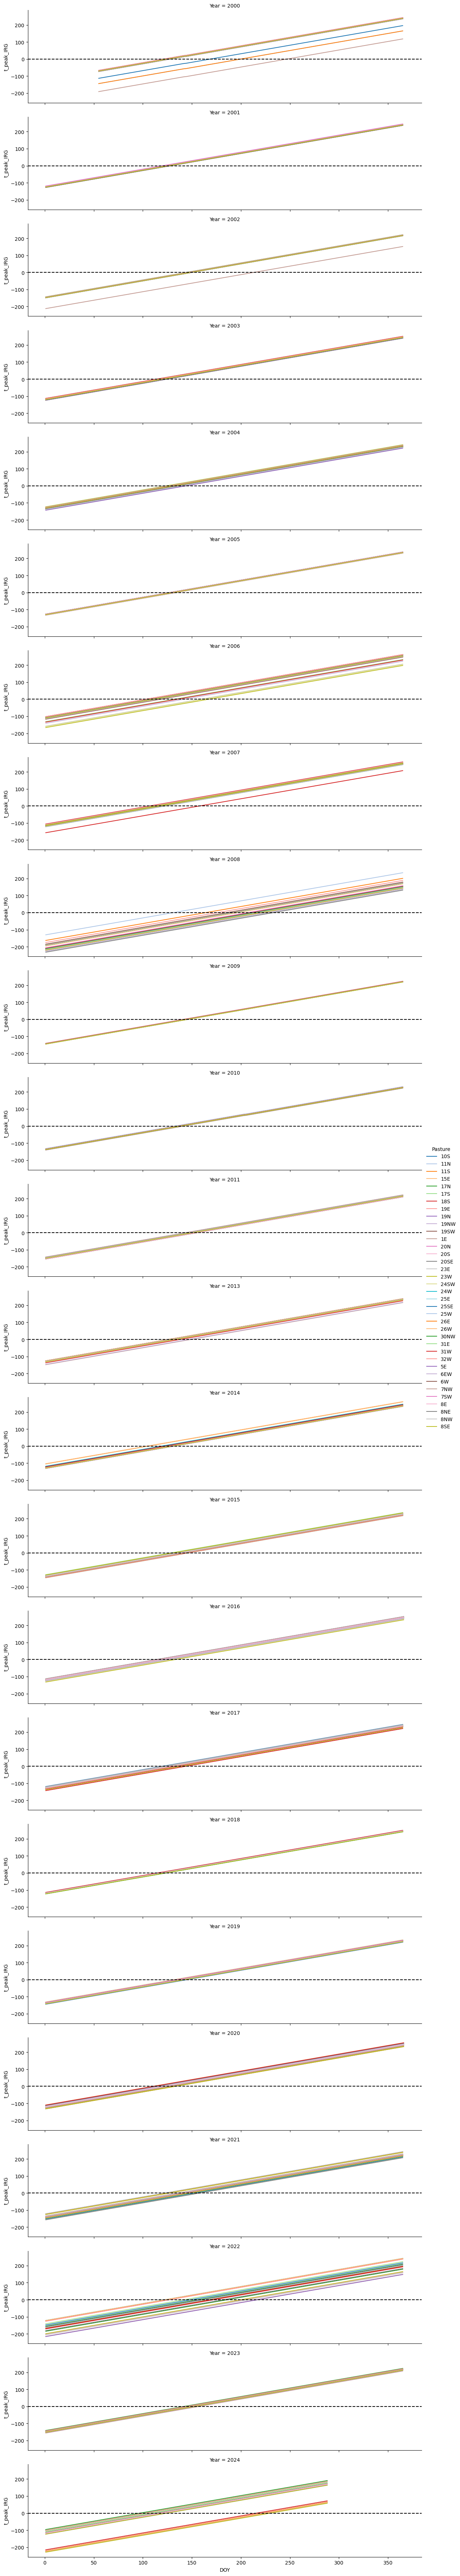

In [25]:
# plot all pastures and all dates on a single figure
p = sns.relplot(data=df_pheno,
            x='DOY', y='t_peak_IRG', 
            row='Year',
            hue='Pasture', palette='tab20',
            kind="line", errorbar=None,
            height=3, aspect=4)
for ax in p.axes.flatten():
    ax.axhline(y=0, linestyle='dashed', color='black')

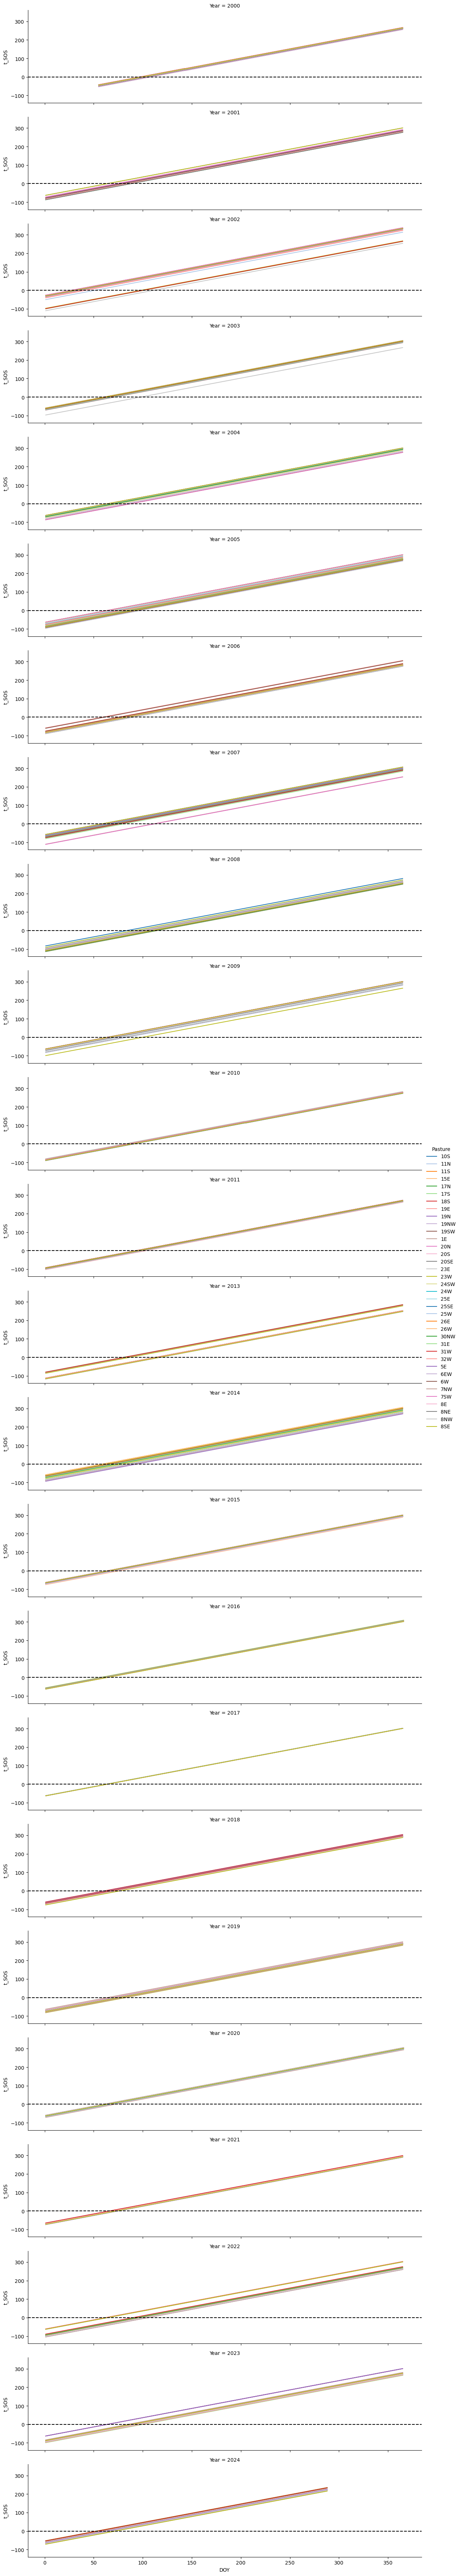

In [26]:
# plot all pastures and all dates on a single figure
p = sns.relplot(data=df_pheno,
            x='DOY', y='t_SOS', 
            row='Year',
            hue='Pasture', palette='tab20',
            kind="line", errorbar=None,
            height=3, aspect=4)
for ax in p.axes.flatten():
    ax.axhline(y=0, linestyle='dashed', color='black')

In [27]:
df_pheno.to_csv(outPATH, index=False)